In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [91]:
#Loading the dataset from the csv file using pandas
data =pd.read_csv('glass-0-1-2-3_vs_4-5-6.csv', header = None)

In [92]:
data.columns=['v1','v2','v3','v4','v5','v6','v7','v8','v9','Class']

In [93]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
X = data[columns]
Y = data[target]
Fraud = data[data["Class"]==1]
Valid = data[data["Class"]==0]
outlier_fraction=len(Fraud)/float(len(Valid))

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

Fraud Cases: 51
Valid Cases: 163


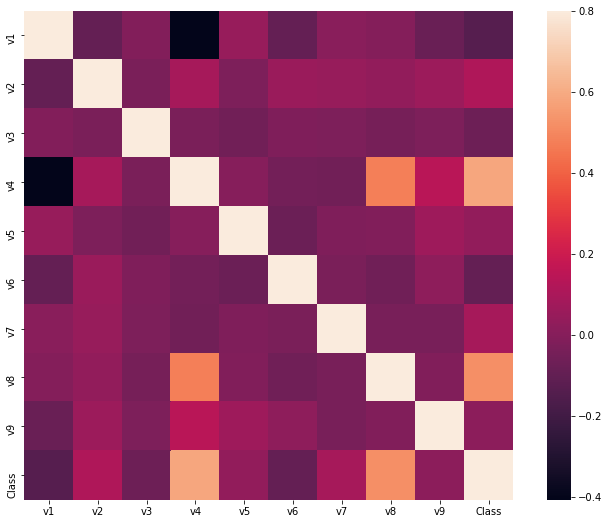

In [85]:
#Correlation matrix
corrmat=data.corr()
fig=plt.figure(figsize = (12,9))

sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [103]:
modelIF = IsolationForest(max_samples=len(X),contamination = outlier_fraction,random_state=1)
modelIF.fit(X)
scores_pred=modelIF.decision_function(X)
y_pred=model.predict(X)
#0 for valid and 1 for Fraud    
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

print(accuracy_score(Y,y_pred))
print(classification_report(Y,y_pred))

0.7383177570093458
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       163
           1       0.46      0.61      0.53        51

    accuracy                           0.74       214
   macro avg       0.66      0.69      0.67       214
weighted avg       0.77      0.74      0.75       214



In [104]:
modelLOL = LocalOutlierFactor(n_neighbors=20,contamination = outlier_fraction)
modelLOL.fit(X)
y_pred = modelLOL.fit_predict(X)
scores_pred = modelLOL.negative_outlier_factor_
#0 for valid and 1 for Fraud    
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

print(accuracy_score(Y,y_pred))
print(classification_report(Y,y_pred))

0.6635514018691588
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       163
           1       0.34      0.45      0.39        51

    accuracy                           0.66       214
   macro avg       0.58      0.59      0.58       214
weighted avg       0.70      0.66      0.68       214



In [116]:
modelSVM = OneClassSVM(gamma='auto',nu=0.5)
modelSVM.fit(X)
scores_pred=modelSVM.decision_function(X)
y_pred=model.predict(X)
#0 for valid and 1 for Fraud    
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

print(accuracy_score(Y,y_pred))
print(classification_report(Y,y_pred))

0.7383177570093458
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       163
           1       0.46      0.61      0.53        51

    accuracy                           0.74       214
   macro avg       0.66      0.69      0.67       214
weighted avg       0.77      0.74      0.75       214



In [118]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(modelSVM,Y,y_pred,cv=5,scoring='accuracy')
print(score)

[nan nan nan nan nan]


/home/hugosouza/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hugosouza/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hugosouza/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 1301, in fit
    super().fit(X, np.ones(_num_samples(X)),
  File "/home/hugosouza/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 160, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/home/hugosouza/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/hugosouza/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 